In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop(['Id'], axis = 1, inplace = True)
df.head()
#

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
map = {'Iris-setosa' : 0, 'Iris-versicolor': 1, 'Iris-virginica' : 2}
df = df.replace(map)
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5044\437025337.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(map)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
x, y = df.drop(['PetalWidthCm','Species'], axis = 1), df[['Species']]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc_scale = StandardScaler()

In [12]:
xtrain = sc_scale.fit_transform(xtrain)
xtest = sc_scale.transform(xtest)

In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [14]:
classifier.fit(xtrain, ytrain)
GaussianNB()

C:\Users\Admin\miniforge3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [15]:
y_pred = classifier.predict(xtest)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[13  0  0]
 [ 0 13  3]
 [ 0  2  7]]


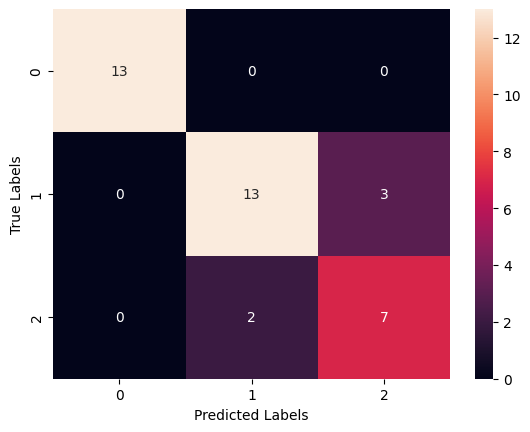

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [18]:
from sklearn.metrics import accuracy_score
print('Accuracy : ', accuracy_score(ytest, y_pred) * 100, '%')

Accuracy :  86.8421052631579 %


In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [20]:
f1=f1_score(ytest,y_pred, average='micro')
print('F1 score:%f'%f1)

F1 score:0.868421


In [21]:
recall= recall_score(ytest, y_pred, average='micro')
print('R.call:%f'%recall)

R.call:0.868421


In [22]:
precision= precision_score(ytest, y_pred, average='micro')
print('Precision:%f'%precision)

Precision:0.868421
